<h1><u><a href="http://ufldl.stanford.edu/housenumbers/">SVHN Dataset</a></u></h1>

<ul><li>10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10</li>
<li>73257 digits for training, 26032 digits for testing </li>
<li>The training and testing are posted as *.mat files</ul>

I'll be performing Data Preprocessing to make sure the data is ready to be fed to the model
<ol><li>Realigning: (width, height, channels, size) -> (size, width, height, channels)</li>
    <li>Converting the Label 10's to 0's</li>
<li>Cropping the images so that only 1 number is visible</li>
<li>Normalizing</li></ol>

In [43]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import h5py
path = '.'

In [44]:
def plot_images(img, labels, nrows):
    fig=plt.figure(figsize=(nrows*2, nrows))
    plt.subplots_adjust(hspace=0.5,wspace=0)
    for i in range(1, nrows*nrows +1):
        img = x_test[i,:,:,:]
        fig.add_subplot(nrows, nrows, i)
        plt.axis('off')
        plt.title(f'{labels[i]}')
        plt.imshow(img, cmap='gray')

In [45]:
def load_images(path):
    train_images = loadmat(path+'/train_32x32.mat')
    test_images = loadmat(path+'/test_32x32.mat')
    return train_images, test_images

In [46]:
train_images, test_images = load_images(path)

In [47]:
x_train = train_images['X']
y_train = train_images['y']
x_test = test_images['X']
y_test = test_images['y']

In [48]:
print("Training Set", x_train.shape, y_train.shape)
print("Test Set", x_test.shape, y_test.shape)

Training Set (32, 32, 3, 73257) (73257, 1)
Test Set (32, 32, 3, 26032) (26032, 1)


<hr><h3>Realigning</h3>

In [49]:
# input image dimensions
img_rows, img_cols = 32, 32

#Keras expects data to be in the format (N_E.N_H,N_W,N_C)
#N_E = Number of Images, N_H = height, N_W = Width, N_C = Number of Channels.
x_train = x_train[np.newaxis,...]
x_train = np.swapaxes(x_train,0,4).squeeze()

x_test = x_test[np.newaxis,...]
x_test = np.swapaxes(x_test,0,4).squeeze()

print("Shape of X_train is:", x_train.shape)
print("Shape of y_train is:", y_train.shape)
print("Shape of X_test is:", x_test.shape)
print("Shape of y_test is:", y_test.shape)

Shape of X_train is: (73257, 32, 32, 3)
Shape of y_train is: (73257, 1)
Shape of X_test is: (26032, 32, 32, 3)
Shape of y_test is: (26032, 1)


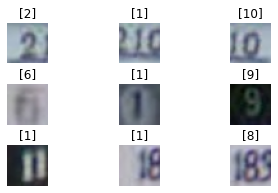

In [50]:
# plotting some testing images
plot_images(x_test,y_test,3)

<hr><h3>Removing label 10</h3>

In [51]:
print(np.unique(y_train))

[ 1  2  3  4  5  6  7  8  9 10]


we can see that there are 11 labels, including '10'

In [52]:
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0
print(np.unique(y_train),np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9] [0 1 2 3 4 5 6 7 8 9]


<hr><h3>Cropping</h3>

In [53]:
# x_train = x_train[:,:,7:24,:]
# x_test = x_test[:,:,7:24,:]

In [54]:
# plot_images(x_test,y_test,3)

<hr><h3>Normalizing</h3>

In [55]:
x_train = x_train / 255
x_test = x_test / 255

In [56]:
with h5py.File("SVHN.hdf5", "w") as f:
    f.create_dataset("x_train", data=x_train, shape=x_train.shape, dtype='float32', compression="gzip")
    f.create_dataset("y_train", data=y_train, shape=y_train.shape, dtype='int32', compression="gzip")
    f.create_dataset('x_test',  data=x_test, shape=x_test.shape, dtype='float32', compression="gzip")
    f.create_dataset('y_test',  data=y_test, shape=y_test.shape, dtype='float32', compression="gzip")

# Close the file
f.close()